# 0. Import Lib *

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
from itertools import combinations
import pickle
from keras.models import  Model, load_model
from keras.layers import Dense, Input
from keras.optimizers import RMSprop


%load_ext autoreload
%autoreload 2
%matplotlib widget

from amftrack.pipeline.launching.run_super import (
    run_launcher,
    directory_scratch,
    directory_project,
    directory_project,
    run_parallel_stitch,
    run_parallel_transfer,
)
import os
from amftrack.util.sys import (
    get_dates_datetime,
    get_dirname,
    temp_path,
    get_data_info,
    update_plate_info,
    update_analysis_info,
    get_analysis_info,
    get_current_folders,
    get_folders_by_plate_id,
)

from time import time_ns
from datetime import datetime
from amftrack.pipeline.launching.run_super import (
    run_parallel,
    directory_scratch,
    directory_project,
    run_parallel_stitch,
)
import sys
import os

from amftrack.util.sys import get_dirname, temp_path
import pandas as pd
import ast
from scipy import sparse
import scipy.io as sio
import cv2
import imageio.v2 as imageio
import numpy as np
import scipy.sparse
import os
from time import time
from amftrack.pipeline.functions.image_processing.extract_skel import (
    extract_skel_new_prince,
    run_back_sub,
    bowler_hat,
)

from amftrack.util.sys import get_dates_datetime, get_dirname
import shutil
import matplotlib.pyplot as plt
from amftrack.pipeline.functions.image_processing.experiment_class_surf import (
    Experiment,
    save_graphs,
    load_graphs,
    Edge,
    Node,
)
from amftrack.pipeline.functions.image_processing.experiment_util import (
    get_random_edge,
    distance_point_edge,
    plot_edge,
    plot_edge_cropped,
    find_nearest_edge,
    get_edge_from_node_labels,
    plot_full_image_with_features,
    get_all_edges,
    get_all_nodes,
    find_neighboring_edges,
    reconstruct_image,
    reconstruct_skeletton_from_edges,
    reconstruct_skeletton_unicolor,
    reconstruct_image_from_general,
    plot_full,
    plot_edge_color_value,
)
from matplotlib import cm
from matplotlib.patches import Rectangle
from IPython.display import clear_output
import re

import sys
import os
import pandas as pd
import numpy as np
import imageio.v2 as imageio
import matplotlib.pyplot as plt
import cv2
from tifffile import imwrite
from tqdm import tqdm
import scipy
import matplotlib as mpl
from pathlib import Path
from amftrack.pipeline.launching.run import (
    run_transfer,
)
from amftrack.pipeline.launching.run_super import run_parallel_transfer
import dropbox
from amftrack.util.dbx import (
    upload_folder,
    download,
    read_saved_dropbox_state,
    save_dropbox_state,
    load_dbx,
    get_dropbox_video_folders,
    download_video_folders_drop,
    download_analysis_folders_drop,
)
from subprocess import call
import logging
import datetime
import glob
import json
from amftrack.pipeline.launching.run_super import run_parallel_flows
from amftrack.util.dbx import upload
# from amftrack.pipeline.functions.image_processing.extract_width_fun import extract_section_profiles_for_edge_exp
import networkx as nx
import random
from scipy.optimize import curve_fit
import cv2
from amftrack.pipeline.functions.post_processing.util import is_in_ROI_node

mpl.rcParams["figure.dpi"] = 60

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# 1. Import Graph *

## 1.1 Import Data *

In [8]:
# To Change according to your need
directory_targ = r"/Users/amin/Documents/AMOLF/Data/Prince/"
plates = ["482_20230908"]
first_index = 0
last_index = 20

update_plate_info(directory_targ, local=True, strong_constraint=False)
all_folders = get_current_folders(directory_targ, local=True)

folders = all_folders.loc[all_folders["unique_id"] == plates[0]]
folders = folders.loc[folders["/Analysis/nx_graph_pruned_width.p"] == True]

folders = folders.sort_values(by="datetime")

exp = Experiment(directory_targ)
exp.dimX_dimY = 0, 0

try:
    exp.load(folders.iloc[first_index:last_index+1].copy(), suffix="_width")
except:
    pass

exp.save_location = exp.folders.iloc[0]['total_path']

analysed:   0%|          | 0/54 [00:00<?, ?it/s]

2023-09-08 14:39:00
2023-09-08 18:38:00
2023-09-08 20:39:00
2023-09-08 22:39:00
2023-09-09 00:39:00
2023-09-09 02:39:00
2023-09-09 04:39:00
2023-09-09 06:37:00
2023-09-09 08:39:00
2023-09-09 10:39:00
2023-09-09 12:39:00
2023-09-09 14:39:00
2023-09-09 16:39:00
2023-09-09 18:37:00
2023-09-09 20:39:00
2023-09-09 22:39:00
2023-09-10 00:39:00
2023-09-10 02:39:00
2023-09-10 04:39:00
2023-09-10 06:37:00
2023-09-10 08:39:00


## 1.2 Plot t=0

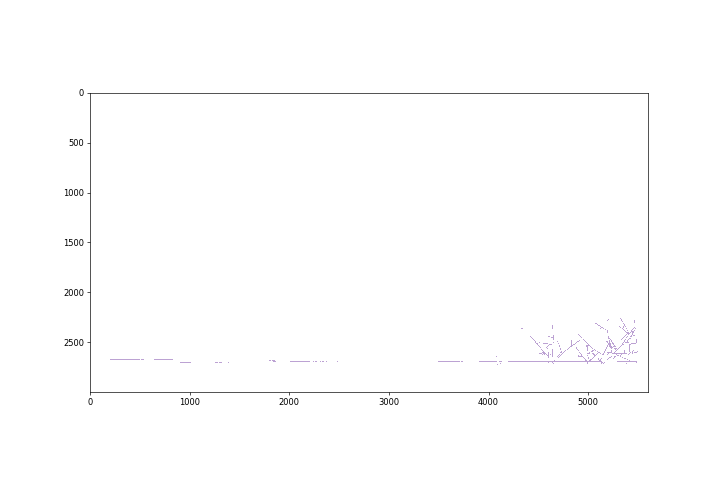

In [6]:
dpi = 400

vmax = 1
vmin = 0
downsizing = 10
plt.close("all")
fig, ax = plot_edge_color_value(
    exp,
    first_index,
    lambda edge: 1,
    cmap=mpl.colormaps.get_cmap("seismic"),
    v_min=vmin,
    v_max=vmax,
    show_background=False,
    dilation=5,
    figsize=(12, 8),
    downsizing=downsizing,
    region=[[0, 0], [30000, 56000]]
)

## 1.3 Plot t=last_inde

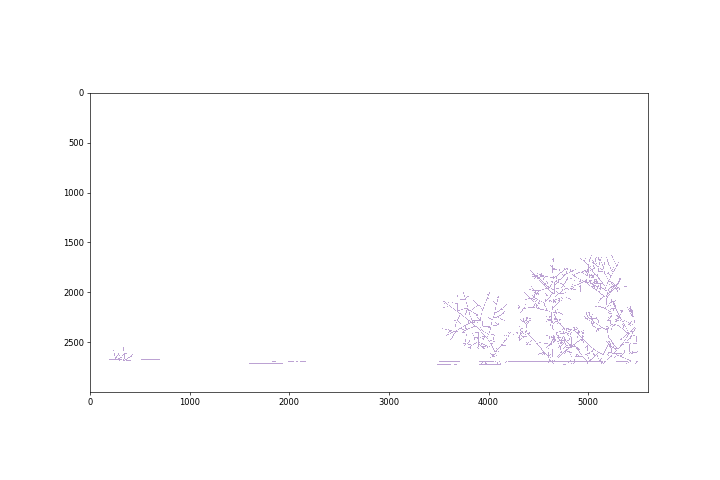

In [7]:
dpi = 400

vmax = 1
vmin = 0
downsizing = 10
plt.close("all")
fig, ax = plot_edge_color_value(
    exp,
    last_index,
    lambda edge: 1,
    cmap=mpl.colormaps.get_cmap("seismic"),
    v_min=vmin,
    v_max=vmax,
    show_background=False,
    dilation=5,
    figsize=(12, 8),
    downsizing=downsizing,
    region=[[0, 0], [30000, 56000]]
)

## 1.4 Video of a region

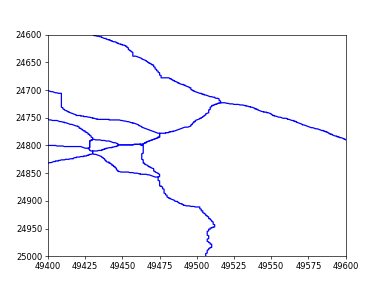

In [105]:
region = [[24600, 49400], [25000, 49600]]
image_folder = "/Users/amin/Documents/AMOLF/Data/Examples/Weird_time_intersection"

def is_in_region(pos, region):
        if region[0][0] < pos[0] and pos[0] < region[1][0] and region[0][1] < pos[1] and pos[1] < region[1][1]:
            return True
        return False

for t in range(last_index+1):
    plt.close("all")

    for edge in get_all_edges(exp, t):
        if is_in_region(edge.begin.pos(t), region) or is_in_region(edge.end.pos(t), region):
            y, x = zip(*edge.pixel_list(t))
            plt.plot(x, y, color="b")

    plt.xlim(region[0][1], region[1][1])
    plt.ylim(region[1][0], region[0][0])
    image_path = os.path.join(image_folder, f'{t:02d}.png')
    plt.savefig(image_path)

In [106]:
video_name = 'test.avi'

images = [img for img in os.listdir(image_folder) if img.endswith(".png")]
images.sort()
frame = cv2.imread(os.path.join(image_folder, images[0]))
height, width, layers = frame.shape

video_path = os.path.join(image_folder, video_name)
video = cv2.VideoWriter(video_path, 0, 1, (width,height))

for image in images:
    video.write(cv2.imread(os.path.join(image_folder, image)))

cv2.destroyAllWindows()
video.release()
print('Video_saved')

Video_saved


# 2. Segmented graph with time *

## 2.1 Cut each edge into segments *

In [14]:
# Size of the segment in pixels
segments_length = 5

final_graph = exp.nx_graph[last_index]
node_not_in_ROI = []
for node in final_graph:
    if not is_in_ROI_node(Node(node, exp), last_index):
        node_not_in_ROI.append(node)
final_graph.remove_nodes_from(node_not_in_ROI)

label = max(final_graph.nodes) + 1
graph_segemented_final = nx.empty_graph()
nodes_pos = {}
edges_indexes = {}
segments_index = {}
segments_center_final = []

for edge in final_graph.edges:
    e = Edge(Node(edge[0], exp), Node(edge[1], exp), exp)
    edges_indexes[f"{edge[0]},{edge[1]}"] = []
    pixels = e.pixel_list(last_index)
    length = len(pixels)
    if length < segments_length:
        graph_segemented_final.add_edge(edge[0], edge[1])
        segments_index[f"{edge[0]},{edge[1]}"] = len(segments_center_final)
        edges_indexes[f"{edge[0]},{edge[1]}"].append(len(segments_center_final))
        central_point = np.mean(np.array(pixels), axis=0)
        segments_center_final.append(central_point)
        nodes_pos[edge[0]] = pixels[0]
        nodes_pos[edge[1]] = pixels[-1]
        continue

    for i in range(0, length, segments_length):
        sub_list = pixels[i:i+segments_length]
        if i==0:
            graph_segemented_final.add_edge(edge[0], label)
            segments_index[f"{edge[0]},{label}"] = len(segments_center_final)
            edges_indexes[f"{edge[0]},{edge[1]}"].append(len(segments_center_final))
            central_point = np.mean(np.array(sub_list), axis=0)
            segments_center_final.append(central_point)
            nodes_pos[edge[0]] = sub_list[0]
            nodes_pos[label] = sub_list[-1]
            label += 1
        elif i+segments_length >= length:
            graph_segemented_final.add_edge(label-1, edge[1])
            segments_index[f"{label-1},{edge[1]}"] = len(segments_center_final)
            edges_indexes[f"{edge[0]},{edge[1]}"].append(len(segments_center_final))
            central_point = np.mean(np.array(sub_list), axis=0)
            segments_center_final.append(central_point)
            nodes_pos[edge[1]] = sub_list[-1]
        else:
            graph_segemented_final.add_edge(label-1, label)
            segments_index[f"{label-1},{label}"] = len(segments_center_final)
            edges_indexes[f"{edge[0]},{edge[1]}"].append(len(segments_center_final))
            central_point = np.mean(np.array(sub_list), axis=0)
            segments_center_final.append(central_point)
            nodes_pos[label] = sub_list[-1]
            label += 1

print(f"amount of nodes: {graph_segemented_final.number_of_nodes()}")
print(f"amount of segments: {graph_segemented_final.number_of_edges()}")

array_segments_center_final = np.array(segments_center_final)
shape_segments_center = array_segments_center_final.shape
print(f"Shape array_segments_center_final: {shape_segments_center}")

amount of nodes: 75213
amount of segments: 75425
Shape array_segments_center_final: (75425, 2)


## 2.2 Min distances over time of each segment while shifting them *

In [15]:
def closest_point(point, points):
    dist_square = np.sum((points-point)**2, axis=1)
    min_index = np.argmin(dist_square)
    return points[min_index], dist_square[min_index]

In [16]:
# When there is a point at a distance of segment under the threshold, the segment is activated (distance in pixel)
# A good distance is (2*segments_length)**2
# Don't forget to square because closest_point give the distance squared
threshold = 10**2

segments_centers = []
segments_min_distances = []
array_segments_center = array_segments_center_final.copy()
for time in reversed(range(last_index+1)):
    print(f"Process time {time}")
    rows = []
    cols = []
    previous_edges = get_all_edges(exp, time)
    for edge in previous_edges:
        p_list = edge.pixel_list(time)
        row, col = zip(*p_list)
        rows.extend(row)
        cols.extend(col)
    
    data = np.ones(len(rows))
    points_matrix = sparse.csr_matrix((data, (rows, cols)))
    
    centers_distance = []
    new_centers = array_segments_center.copy()
    for index, center in enumerate(array_segments_center):
        xc, yc = center
        xc, yc = int(xc), int(yc)

        min_x, max_x = max(0, xc-4*segments_length), xc+4*segments_length
        min_y, max_y = max(0, yc-4*segments_length), yc+4*segments_length
        coords = points_matrix[min_x:max_x, min_y:max_y].nonzero()
        coords = np.column_stack(coords)
        if not coords.shape[0]:
            centers_distance.append(32*(segments_length**2))
            continue

        xc -= min_x
        yc -= min_y

        new_center, min_dist = closest_point([xc, yc], coords)
        centers_distance.append(min_dist)
        if min_dist < threshold:
            new_centers[index] = new_center + np.array([min_x, min_y])
    
    array_segments_center = new_centers
    segments_centers.append(new_centers)
    segments_min_distances.append(centers_distance)

segments_min_distances.reverse()
# Index t are the centers of the segments at time t
segments_centers.reverse()

Process time 20


Process time 19
Process time 18
Process time 17
Process time 16
Process time 15
Process time 14
Process time 13
Process time 12
Process time 11
Process time 10
Process time 9
Process time 8
Process time 7
Process time 6
Process time 5
Process time 4
Process time 3
Process time 2
Process time 1
Process time 0


## 2.3 Each edge time interval *

In [17]:
# Amount of segment to look for at in an edge to get the date at which the edge encounter the node
# Depends of how big segments are and what threshold you use
amount_of_border_segment = 7

segments_min_distances_array = np.array(segments_min_distances)
segments_min_distances_array = np.where(segments_min_distances_array<threshold, 1, 0)
segments_time = segments_min_distances_array.argmax(axis=0)

edges_time_interval = {}

for e in final_graph.edges:
    edge = Edge(Node(e[0], exp), Node(e[1], exp), exp)
    segments_indexes = edges_indexes[f"{edge.begin.label},{edge.end.label}"]
    segments_times = np.array([segments_time[index] for index in segments_indexes])

    begin = np.median(segments_times[:amount_of_border_segment])
    if len(segments_times)>amount_of_border_segment:
        end = np.median(segments_times[-amount_of_border_segment:])
    else:
        end = np.median(segments_times)

    edges_time_interval[f"{edge.begin.label},{edge.end.label}"] = (begin, end)

print(edges_time_interval)

{'2186,2245': (20.0, 19.0), '2245,2095': (20.0, 20.0), '2245,2262': (19.0, 18.0), '1028,1094': (20.0, 20.0), '1094,1115': (20.0, 20.0), '1094,1128': (19.0, 19.0), '1263,1197': (20.0, 19.0), '1197,1128': (18.0, 19.0), '1197,1465': (18.0, 16.0), '1128,1058': (20.0, 20.0), '2532,2395': (20.0, 18.0), '2481,2262': (20.0, 19.0), '2262,2306': (18.0, 17.0), '1465,1585': (16.0, 15.0), '1465,1432': (16.0, 16.0), '2395,2306': (18.0, 18.0), '2395,2499': (19.0, 20.0), '2834,2499': (20.0, 19.0), '1091,1124': (20.0, 19.0), '2499,2323': (18.0, 17.0), '2306,2307': (17.0, 17.0), '2323,2307': (17.0, 17.0), '2323,2388': (17.0, 15.0), '1854,1878': (20.0, 20.0), '1124,1432': (18.0, 16.0), '1124,909': (18.0, 20.0), '2307,2149': (17.0, 15.0), '2149,2063': (15.0, 14.0), '2149,2320': (16.0, 17.0), '2106,1878': (20.0, 18.0), '1878,1829': (18.0, 18.0), '1829,1585': (18.0, 16.0), '1829,1994': (19.0, 20.0), '1432,1306': (20.0, 18.0), '1585,1687': (15.0, 13.0), '1306,1292': (18.0, 17.0), '1306,1389': (18.0, 17.0), '

## 2.4 Plot random segments min_dist

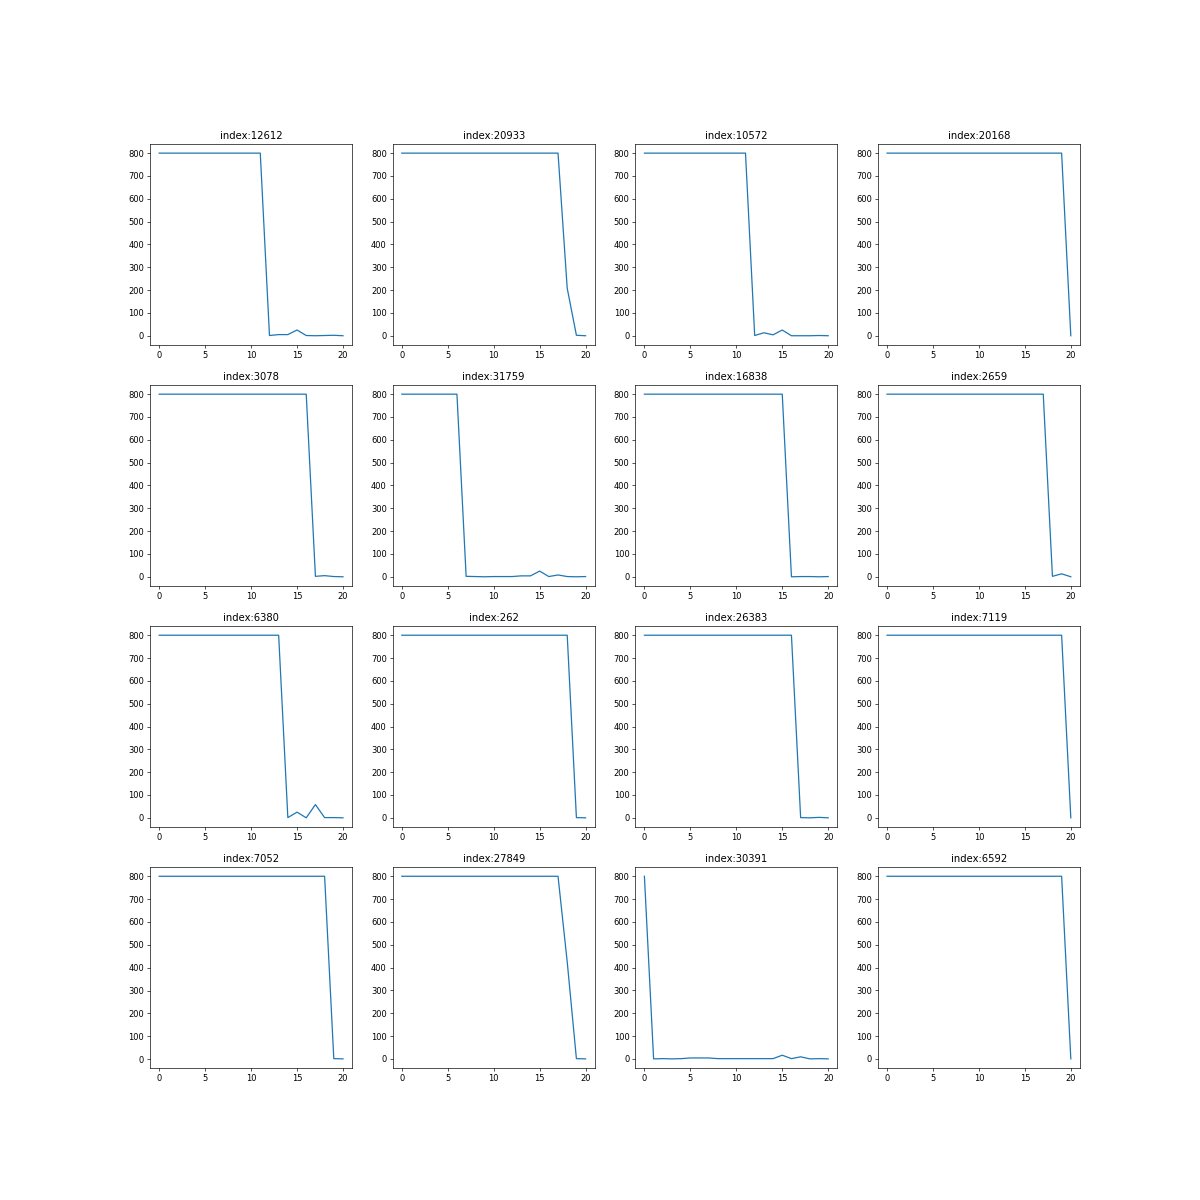

In [20]:
plt.close("all")
plt.figure(figsize=(20,20))

good_segments = []
for key, index in segments_index.items():
    y, x = segments_center_final[index]
    if y < 22000:
        good_segments.append(index)


for i in range(16):
    plt.subplot(4,4,i+1)
    times = []
    distance = []
    randint = random.randint(0, len(good_segments))
    for t, activations in enumerate(segments_min_distances):
        times.append(t)
        distance.append(activations[good_segments[randint]])

    plt.plot(times, distance)
    plt.title(f"index:{randint}")

## 2.5 Plot Each Segments colored by its activation time

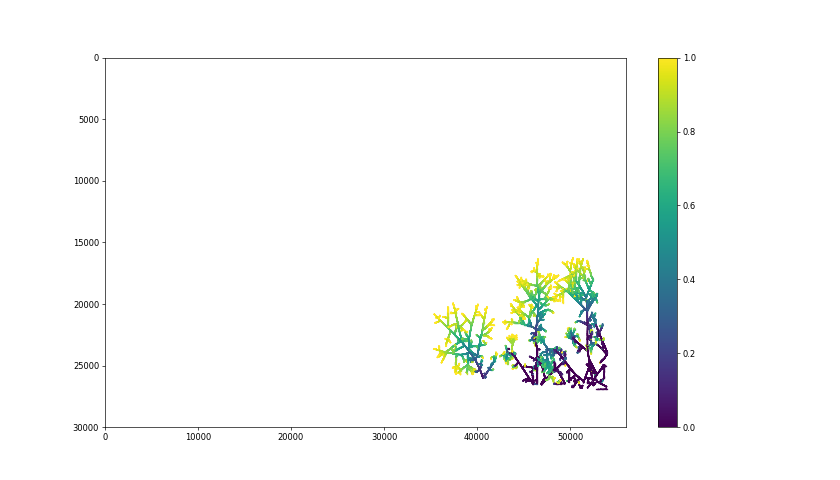

In [23]:
plt.close("all")
fig, ax1 = plt.subplots(1, 1, figsize=(14, 8)) 

for key, edge in enumerate(graph_segemented_final.edges):
    begin, end = edge
    (y1, x1), (y2, x2) = nodes_pos[begin], nodes_pos[end]
    index = segments_index.get(f"{begin},{end}")
    if index is None:
        index = segments_index[f"{end},{begin}"]
    time = segments_time[index]
    color = cm.viridis(time/last_index)
    if time < 100:
    
        ax1.plot([x1, x2], [y1, y2], c=color)

sm = plt.cm.ScalarMappable(cmap=cm.viridis) 
sm.set_array([]) 
plt.colorbar(sm, ax=ax1) 

plt.xlim(0, 56000)
plt.ylim(0, 30000)
plt.gca().invert_yaxis()

## 2.6 Plot each edge colored by its activation time

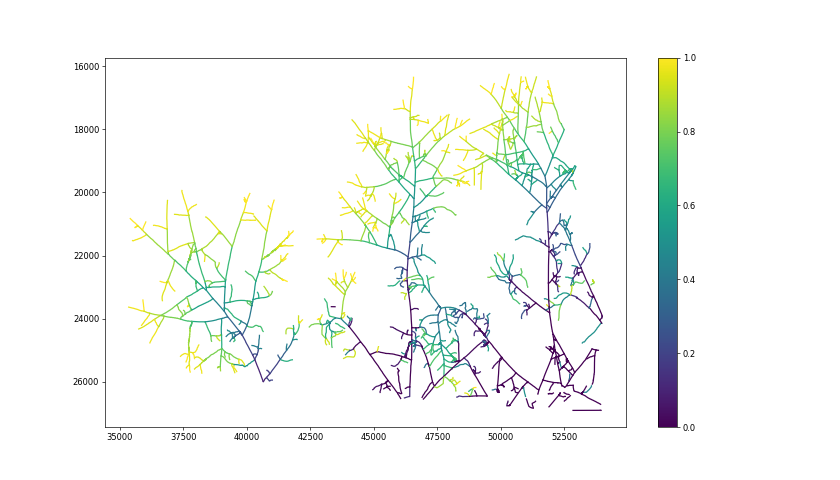

In [24]:
plt.close("all")
fig, ax1 = plt.subplots(1, 1, figsize=(14, 8))

for e in final_graph.edges:
    edge = Edge(Node(e[0], exp), Node(e[1], exp), exp)
    time_interval = edges_time_interval.get(f"{edge.begin.label},{edge.end.label}")
    time = (time_interval[0]+time_interval[1])/2 # type: ignore
    pixels = edge.pixel_list(last_index)
    y, x = zip(*pixels)
    color = cm.viridis(time/last_index)
    plt.plot(x, y, color=color)

sm = plt.cm.ScalarMappable(cmap=cm.viridis)
sm.set_array([]) 
plt.colorbar(sm, ax=ax1) 

plt.gca().invert_yaxis()

# 3. HyperGraph

The \* need to be run for this part

## 3.1 Functions

In [25]:
import networkx as nx
import numpy as np
from tqdm.notebook import tqdm  # for Jupyter notebook or IPython

positions = exp.positions[last_index]

def angle_between(vec1, vec2):
    dot_product = np.dot(vec1, vec2)
    norm_product = np.linalg.norm(vec1) * np.linalg.norm(vec2)
    return np.arccos(np.clip(dot_product / norm_product, -1.0, 1.0))

def score_angle(v1, v2, v, positions):
    vec1 = np.array(positions[v1]) - np.array(positions[v])
    vec2 = np.array(positions[v2]) - np.array(positions[v])
    angle = np.abs(angle_between(vec1, vec2) - np.pi)
    return angle

def score(v1, v2, v, positions, edges_time_interval):
    vec1 = np.array(positions[v1]) - np.array(positions[v])
    vec2 = np.array(positions[v2]) - np.array(positions[v])
    angle = np.abs(angle_between(vec1, vec2) - np.pi)

    time_interval1 = edges_time_interval.get(f"{v1},{v}")
    if time_interval1 is None:
        time1, _ = edges_time_interval[f"{v},{v1}"]
    else:
        time1 = time_interval1[1]
    time_interval2 = edges_time_interval.get(f"{v2},{v}")
    if time_interval2 is None:
        time2, _ = edges_time_interval[f"{v},{v2}"]
    else:
        time2 = time_interval2[1]

    time_diff = np.abs(time1-time2)

    return -2*angle/np.pi - time_diff


def relation(v, e1, e2, EExtract, E, positions, edges_time_interval):
    v_i = E[e1][0] if E[e1][1] == v else E[e1][1]
    v_j = E[e2][0] if E[e2][1] == v else E[e2][1]

    time_score_ij = score(v_i, v_j, v, positions, edges_time_interval)

    # Check the second condition
    for e in EExtract:
        if e != e1 and e != e2:
            v_k = E[e][0] if E[e][1] == v else E[e][1]

            time_score_vi = score(v_i, v_k, v, positions, edges_time_interval)
            time_score_vj = score(v_j, v_k, v, positions, edges_time_interval)
            if (time_score_ij < time_score_vi or time_score_ij< time_score_vj):
                return False
            if time_score_ij==time_score_vi or time_score_ij==time_score_vj:
                print('equal')
    return True


def edge_matches(v, EExtract, E, positions, edges_time_interval) -> list:
    if len(EExtract) < 2:
        return []

    times = []
    vs = []
    for e in EExtract:
        v_i =  E[e][0] if E[e][1] == v else E[e][1]
        time_interval = edges_time_interval.get(f"{v_i},{v}")
        if time_interval is None:
            time, _ = edges_time_interval[f"{v},{v_i}"]
        else:
            time = time_interval[1]
        vs.append(v_i)
        times.append(time)

    min_time = min(times)
    min_time_edges = [index for index, time in enumerate(times) if time==min_time]

    if len(min_time_edges)==2:
        e1 = EExtract[min_time_edges[0]]
        e2 = EExtract[min_time_edges[1]]
        return [(e1, e2, 'time_resolved')] + edge_matches(v, [edge_index for edge_index in EExtract if (edge_index!=e1 and edge_index!=e2)], E, positions, edges_time_interval)

    if len(min_time_edges) >= 2:
        pairs = combinations(min_time_edges, 2)
        angle = np.pi
        for index1, index2 in pairs:
            angle_between = score_angle(vs[index1], vs[index2], v, positions)
            if angle_between < angle:
                angle = angle_between
                e1 = EExtract[index1]
                e2 = EExtract[index2]
        return [(e1, e2, 'geometricaly_resolved')] + edge_matches(v, [edge_index for edge_index in EExtract if (edge_index!=e1 and edge_index!=e2)], E, positions, edges_time_interval)

    min_time_edge = min_time_edges[0]
    second_min_time = min([time for time in times if time!=min_time])
    second_time_edges = [index for index, time in enumerate(times) if time==second_min_time]
    
    if len(second_time_edges)==1:
        e1 = EExtract[min_time_edge]
        e2 = EExtract[second_time_edges[0]]
        return [(e1, e2, 'time_resolved')] + edge_matches(v, [edge_index for edge_index in EExtract if (edge_index!=e1 and edge_index!=e2)], E, positions, edges_time_interval)

    e1 = EExtract[min_time_edge]
    angle = np.pi
    for index in second_time_edges:
        angle_between = score_angle(vs[min_time_edge], vs[index], v, positions)
        if angle_between < angle:
            angle = angle_between
            e2 = EExtract[index]

    return [(e1, e2, 'geometricaly_resolved')] + edge_matches(v, [edge_index for edge_index in EExtract if (edge_index!=e1 and edge_index!=e2)], E, positions, edges_time_interval)


def hypergraph_from_graph(G, positions, edges_time_interval, get_time_resolved_intersections=False):
    V = list(G.nodes())
    E = list(G.edges())
    e = len(E)
    v = len(V)

    H = [0] * e
    Cor = [[0] * 10 for _ in range(e)]

    if get_time_resolved_intersections:
        time_resolved_intersections = []

    # STEP 1
    for i in tqdm(V, desc="Processing vertices"):
        EExtract = [edge_idx for edge_idx, edge in enumerate(E) if i in edge]
        matches = edge_matches(i, EExtract, E, positions, edges_time_interval)
        for match in matches:
            e1, e2 = match[0], match[1]
            Cor[e1][Cor[e1].index(0)] = e2
            Cor[e2][Cor[e2].index(0)] = e1
        if get_time_resolved_intersections and matches and matches[0][2]=='time_resolved':
            time_resolved_intersections.append((EExtract, matches[0][0], matches[0][1], positions[i]))

    # STEP 2
    CurrentMark = 1
    for i in tqdm(range(e), desc="Processing stack"):
        if H[i] == 0:
            stack = [i]
            visited = set()  # To keep track of edges that have been added to the stack
            while stack:
                current = stack.pop()
                H[current] = CurrentMark
                # Only add edges to the stack that haven't been assigned to a hyperedge and aren't already on the stack
                related_edges = [
                    cor
                    for cor in Cor[current]
                    if cor != 0 and H[cor] == 0 and cor not in visited
                ]
                stack.extend(related_edges)
                visited.update(related_edges)
            CurrentMark += 1
    H = {edge: H[i] for i, edge in enumerate(E)}
    if get_time_resolved_intersections:
        return H, time_resolved_intersections
    return H

## 3.2 Instanciation

In [41]:
# Example usage
G = final_graph
E = list(G.edges())

# Add edges to G...
H = hypergraph_from_graph(G, positions, edges_time_interval)
H = {Edge(Node(edge[0], exp), Node(edge[1], exp), exp): H[edge] for edge in H.keys()}

Processing vertices:   0%|          | 0/2603 [00:00<?, ?it/s]

Processing stack:   0%|          | 0/1561 [00:00<?, ?it/s]

## 3.3 Plot

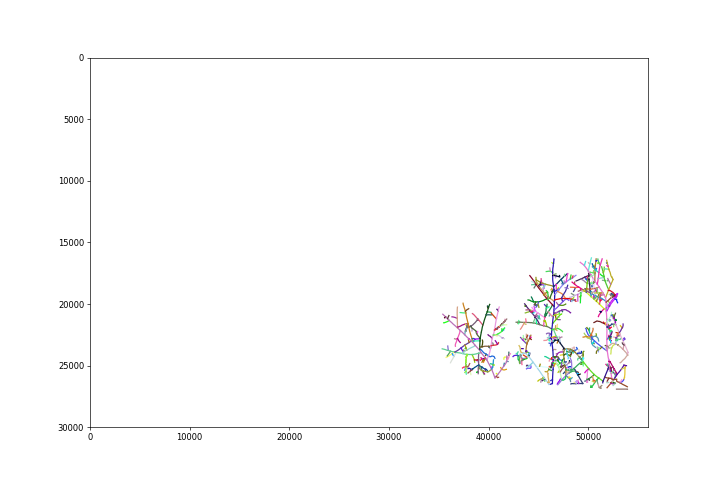

In [42]:
plt.close('all')
fig, ax1 = plt.subplots(1, 1, figsize=(12, 8))

def random_color():
    return tuple(random.random() for _ in range(3))

colors = {}
for _, value in H.items():
    colors[value] = random_color()

for edge, value in H.items():
    pixels = edge.pixel_list(last_index)
    x, y = zip(*pixels)
    plt.plot(y, x, color=colors[value])

plt.xlim(0, 56000)
plt.ylim(0, 30000)
plt.gca().invert_yaxis()

# 4. Create a dataset to analyze intersections geometricaly

The \* and 3.1 need to be run for this section

## 4.1 Acquire useful intersections

In [60]:
# Example usage
G = final_graph
E = list(G.edges())

# Add edges to G...
_, time_resolved_intersections = hypergraph_from_graph(G, positions, edges_time_interval, get_time_resolved_intersections=True)

Processing vertices:   0%|          | 0/2603 [00:00<?, ?it/s]

Processing stack:   0%|          | 0/1561 [00:00<?, ?it/s]

## 4.2 Create the dataset: set of 3 edges

In [61]:
dataset = []

for edge_list, e1, e2, intersection in time_resolved_intersections:
    if len(edge_list) > 2:
        edge1 = Edge(Node(E[e1][0], exp), Node(E[e1][1], exp), exp)
        pixels1 = np.array(edge1.pixel_list(last_index)) - intersection
        if np.linalg.norm(pixels1[0]) > np.linalg.norm(pixels1[-1]):
            pixels1 = np.flip(pixels1, 0)

        edge2 = Edge(Node(E[e2][0], exp), Node(E[e2][1], exp), exp)
        pixels2 = edge2.pixel_list(last_index) - intersection
        if np.linalg.norm(pixels2[0]) > np.linalg.norm(pixels2[-1]):
            pixels2 = np.flip(pixels2, 0)

        for e in edge_list:
            if e!=e1 and e!=e2:
                edge = Edge(Node(E[e][0], exp), Node(E[e][1], exp), exp)
                pixels = np.array(edge.pixel_list(last_index)) - intersection
                if np.linalg.norm(pixels[0]) > np.linalg.norm(pixels[-1]):
                    pixels = np.flip(pixels, 0)
                data = [(pixels1, 0), (pixels2, 0), (pixels, 1)]
                random.shuffle(data)
                label = [label for _, label in data]
                pixels_lists = [list(pixels_list) for pixels_list, _ in data]
        dataset.append((pixels_lists, label))

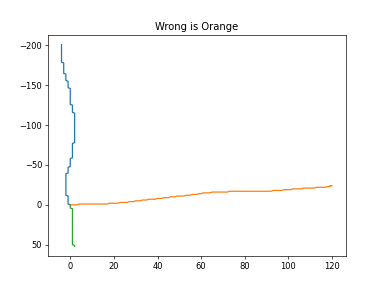

In [578]:
plt.close("all")

index = random.randint(0, len(dataset)-1)
for pixels_list in dataset[index][0]:
    y, x = zip(*pixels_list)
    plt.plot(x, y)

color_index = {0:'Blue', 1:'Orange', 2:'Green'}
plt.title(f'Wrong is {color_index[np.argmax(dataset[index][1])]}')
plt.gca().invert_yaxis()

## 4.3 Save the dataset: set of 3 edges

In [62]:
dataset_path = f"/Users/amin/Documents/AMOLF/Data/models/Intersection_dataset/{plates[0]}.p"

with open(dataset_path, 'wb') as f:
    pickle.dump(dataset, f)

## 4.4 Create the dataset: set of 2 edges

In [92]:
dataset_2 = []

for edge_list, e1, e2, intersection in time_resolved_intersections:
    if len(edge_list) > 2:
        edge1 = Edge(Node(E[e1][0], exp), Node(E[e1][1], exp), exp)
        pixels1 = np.array(edge1.pixel_list(last_index)) - intersection
        if np.linalg.norm(pixels1[0]) > np.linalg.norm(pixels1[-1]):
            pixels1 = np.flip(pixels1, 0)

        edge2 = Edge(Node(E[e2][0], exp), Node(E[e2][1], exp), exp)
        pixels2 = edge2.pixel_list(last_index) - intersection
        if np.linalg.norm(pixels2[0]) > np.linalg.norm(pixels2[-1]):
            pixels2 = np.flip(pixels2, 0)

        dataset_2.append(([pixels1, pixels2], 1))

        for e in edge_list:
            if e!=e1 and e!=e2:
                edge = Edge(Node(E[e][0], exp), Node(E[e][1], exp), exp)
                pixels = np.array(edge.pixel_list(last_index)) - intersection
                if np.linalg.norm(pixels[0]) > np.linalg.norm(pixels[-1]):
                    pixels = np.flip(pixels, 0)
                dataset_2.append(([pixels1, pixels], 0))
                dataset_2.append(([pixels2, pixels], 0))

## 4.5 Save the dataset: set of 2 edges

In [94]:
dataset_path_2 = f"/Users/amin/Documents/AMOLF/Data/models/Intersection_dataset_2/{plates[0]}.p"

with open(dataset_path_2, 'wb') as f:
    pickle.dump(dataset_2, f)

# 5. ML to geometrically learn intersections: set of 3

## 5.1 Load the dataset

In [49]:
dataset_path = f"/Users/amin/Documents/AMOLF/Data/models/Intersection_dataset/{plates[0]}.p"

with open(dataset_path, "rb") as fp:   # Unpickling
    dataset = pickle.load(fp)

## 5.2 Distribution of pixels_list length

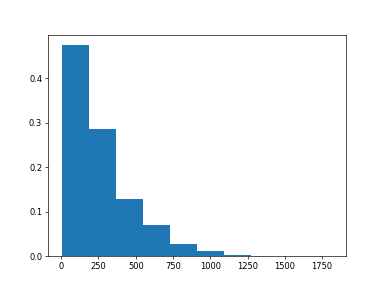

In [335]:
plt.close("all")
lengths = []
for intersection, _ in dataset:
    for pixels in intersection:
        lengths.append(len(pixels))

weights = np.ones_like(lengths) / len(lengths)
plt.hist(lengths, weights=weights);

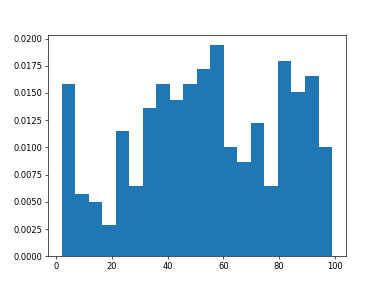

In [336]:
plt.close('all')
small_length = [l for l in lengths if l <100]
weights = np.ones_like(small_length) / len(lengths)
plt.hist(small_length, weights=weights, bins=20);

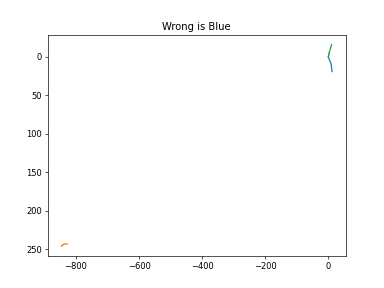

In [499]:
plt.close("all")

index = random.randint(0, len(dataset)-1)
for pixels_list in dataset[index][0]:
    y, x = zip(*pixels_list[:20])
    plt.plot(x, y)

color_index = {0:'Blue', 1:'Orange', 2:'Green'}
plt.title(f'Wrong is {color_index[np.argmax(dataset[index][1])]}')
plt.gca().invert_yaxis()

## 5.3 Format the dataset

In [50]:
length_pixel_list = 100

X, y = [], []

for pixels_lists, label in dataset:
    pixels_lists_sliced = []
    for pixels in pixels_lists:
        pixels_to_add = (pixels+([pixels[-1]]*length_pixel_list))[:length_pixel_list]
        pixels_lists_sliced.extend(pixels_to_add)
    X.append(np.array(pixels_lists_sliced).flatten())
    y.append(np.array(label))

X_train, X_test = X[:400], np.array(X[400:])
y_train, y_test = y[:400], np.array(y[400:])

# Train on all rotations
for pixels, labels in zip(X_train.copy(), y_train.copy()):
    X_train.append(np.roll(pixels, 2*length_pixel_list))
    y_train.append(np.roll(labels, 1))
    X_train.append(np.roll(pixels, -2*length_pixel_list))
    y_train.append(np.roll(labels, -1))

X_train, y_train = np.array(X_train), np.array(y_train)

## 5.4 Train

In [18]:
x = Input(shape=(length_pixel_list*2*3,))
h = Dense(256, activation='relu')(x)
y = Dense(3, activation='softmax')(h)
model = Model(x, y)

model.compile(optimizer=RMSprop(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
print("input shape ", model.input_shape)
print("output shape ", model.output_shape)

history = model.fit(
    X_train,
    y_train,
    validation_data=(X_test, y_test),
    batch_size=64,
    epochs=150,
    verbose=2
)

input shape  (None, 600)
output shape  (None, 3)
Epoch 1/150


19/19 - 1s - 26ms/step - accuracy: 0.6508 - loss: 19.1879 - val_accuracy: 0.7500 - val_loss: 16.9101
Epoch 2/150
19/19 - 0s - 11ms/step - accuracy: 0.7825 - loss: 8.0643 - val_accuracy: 0.6406 - val_loss: 19.8286
Epoch 3/150
19/19 - 0s - 18ms/step - accuracy: 0.7967 - loss: 8.6588 - val_accuracy: 0.7812 - val_loss: 10.3239
Epoch 4/150
19/19 - 0s - 8ms/step - accuracy: 0.8158 - loss: 8.5339 - val_accuracy: 0.7812 - val_loss: 20.0089
Epoch 5/150
19/19 - 0s - 5ms/step - accuracy: 0.8150 - loss: 7.6695 - val_accuracy: 0.8125 - val_loss: 11.5880
Epoch 6/150
19/19 - 0s - 5ms/step - accuracy: 0.8317 - loss: 7.3452 - val_accuracy: 0.8125 - val_loss: 8.7866
Epoch 7/150
19/19 - 0s - 5ms/step - accuracy: 0.8400 - loss: 6.7450 - val_accuracy: 0.7656 - val_loss: 13.9758
Epoch 8/150
19/19 - 0s - 4ms/step - accuracy: 0.8433 - loss: 6.6573 - val_accuracy: 0.7656 - val_loss: 12.8259
Epoch 9/150
19/19 - 0s - 4ms/step - accuracy: 0.8425 - loss: 6.8198 - val_accuracy: 0.6875 - val_loss: 22.5081
Epoch 10/1

## 5.5 Save the model

In [19]:
model_path = "/Users/amin/Documents/AMOLF/Data/models/intersection_model.keras"
model.save(model_path)

## 5.6 Visualization

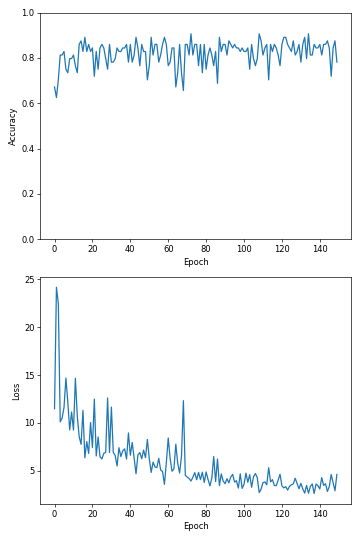

In [706]:
plt.close('all')
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 9))

ax1.plot(history.history["val_accuracy"])
ax1.set_ylabel("Accuracy")
ax1.set_ylim([0, 1])
ax1.set_xlabel("Epoch")

ax2.plot(history.history["val_loss"])
ax2.set_ylabel("Loss")
# ax2.set_ylim(top=2.5)
ax2.set_xlabel("Epoch")
plt.tight_layout()

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


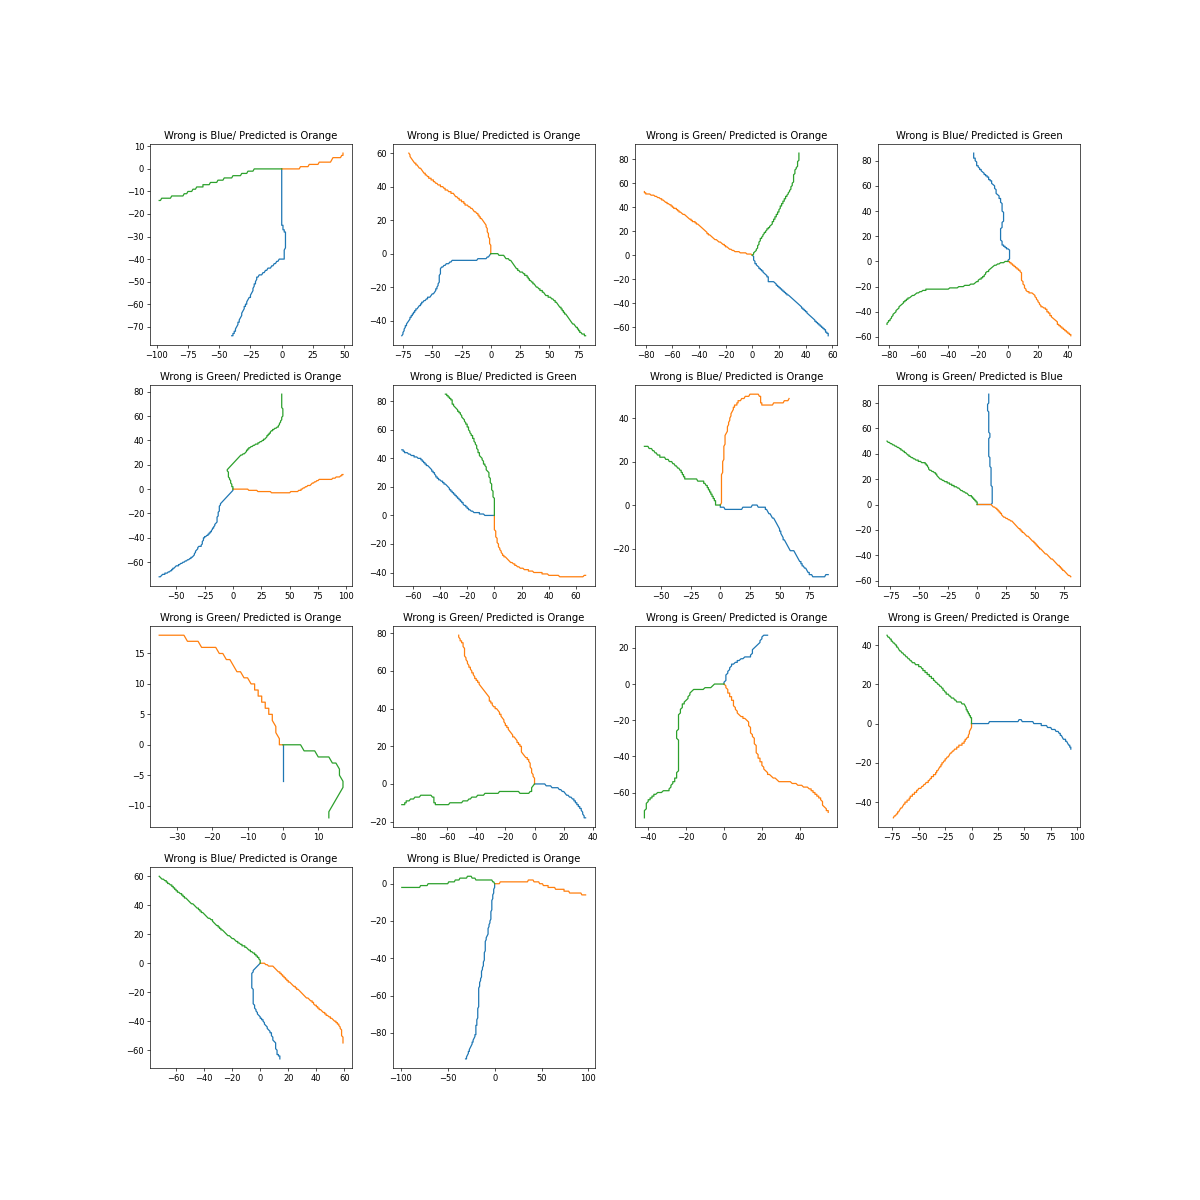

In [707]:
y_pred = model.predict(X_test)
y_label_pred = np.argmax(y_pred, axis=1)
y_label = np.argmax(y_test, axis=1)

plt.close('all')
plt.figure(figsize=(20,20))
color_index = {0:'Blue', 1:'Orange', 2:'Green'}
i=0
for y_pred, y_true, pixels in zip(y_label_pred, y_label, X_test):
    if y_pred != y_true and i<16:
        i+=1
        plt.subplot(4,4,i)
        for k in range(3):
            plt.plot(pixels[length_pixel_list*2*k:length_pixel_list*(2*k+2):2], pixels[1+length_pixel_list*2*k:length_pixel_list*(2*k+2):2])
        plt.title(f'Wrong is {color_index[y_true]}/ Predicted is {color_index[y_pred]}')

# 6 Hypergraph using ml set of 3

The * need to be run for this section

## 6.1 Functions

In [20]:
import networkx as nx
import numpy as np
from tqdm.notebook import tqdm  # for Jupyter notebook or IPython

length_pixel_list = 100
model_path = "/Users/amin/Documents/AMOLF/Data/models/intersection_model.keras"
model = load_model(model_path)
positions = exp.positions[last_index]

def angle_between(vec1, vec2):
    dot_product = np.dot(vec1, vec2)
    norm_product = np.linalg.norm(vec1) * np.linalg.norm(vec2)
    return np.arccos(np.clip(dot_product / norm_product, -1.0, 1.0))

def score_angle(v1, v2, v, positions):
    vec1 = np.array(positions[v1]) - np.array(positions[v])
    vec2 = np.array(positions[v2]) - np.array(positions[v])
    angle = np.abs(angle_between(vec1, vec2) - np.pi)
    return angle

def score_ml(v1, v2, v3, v, positions):
    intersection = positions[v]
    data = []
    for vi in [v1, v2, v3]:
        edge = Edge(Node(v, exp), Node(vi, exp), exp)
        pixels = np.array(edge.pixel_list(last_index)) - intersection
        if np.linalg.norm(pixels[0]) > np.linalg.norm(pixels[-1]):
            pixels = np.flip(pixels, 0)
        pixels = (list(pixels) + [pixels[-1]]*length_pixel_list)[:length_pixel_list]
        data.extend(pixels)
    data = np.array(data).reshape(1, -1)
    return model.predict(data, verbose=0)[0]
    

def edge_matches_ml(v, EExtract, E, positions, edges_time_interval) -> list:
    if len(EExtract) < 2:
        return []

    times = []
    vs = []
    for e in EExtract:
        v_i =  E[e][0] if E[e][1] == v else E[e][1]
        time_interval = edges_time_interval.get(f"{v_i},{v}")
        if time_interval is None:
            time, _ = edges_time_interval[f"{v},{v_i}"]
        else:
            time = time_interval[1]
        vs.append(v_i)
        times.append(time)

    min_time = min(times)
    min_time_edges = [index for index, time in enumerate(times) if time==min_time]

    if len(min_time_edges)==2:
        e1 = EExtract[min_time_edges[0]]
        e2 = EExtract[min_time_edges[1]]
        return [(e1, e2, 'time_resolved')] + edge_matches_ml(v, [edge_index for edge_index in EExtract if (edge_index!=e1 and edge_index!=e2)], E, positions, edges_time_interval)

    if len(min_time_edges) > 2:
        index1, index2, index3 = min_time_edges[:3]
        scores = score_ml(vs[index1], vs[index2], vs[index3], v, positions)
        wrong_index = np.argmax(scores)
        indexes = ((wrong_index+1)%3, (wrong_index+2)%3)
        e1 = EExtract[min_time_edges[indexes[0]]]
        e2 = EExtract[min_time_edges[indexes[1]]]
        return [(e1, e2, 'geometricaly_resolved')] + edge_matches_ml(v, [edge_index for edge_index in EExtract if (edge_index!=e1 and edge_index!=e2)], E, positions, edges_time_interval)

    min_time_edge = min_time_edges[0]
    second_min_time = min([time for time in times if time!=min_time])
    second_time_edges = [index for index, time in enumerate(times) if time==second_min_time]
    
    if len(second_time_edges)==1:
        e1 = EExtract[min_time_edge]
        e2 = EExtract[second_time_edges[0]]
        return [(e1, e2, 'time_resolved')] + edge_matches_ml(v, [edge_index for edge_index in EExtract if (edge_index!=e1 and edge_index!=e2)], E, positions, edges_time_interval)

    e1 = EExtract[min_time_edge]
    min_score = 1
    for indexes in combinations(second_time_edges, 2):
        score = score_ml(vs[indexes[0]], vs[indexes[1]], vs[min_time_edge], v, positions)
        index_min_score = np.argmin(score[:2])
        if score[index_min_score] < min_score:
            index = index_min_score
    e2 = EExtract[index]
    return [(e1, e2, 'geometricaly_resolved')] + edge_matches_ml(v, [edge_index for edge_index in EExtract if (edge_index!=e1 and edge_index!=e2)], E, positions, edges_time_interval)


def hypergraph_from_graph_ml(G, positions, edges_time_interval, get_time_resolved_intersections=False):
    V = list(G.nodes())
    E = list(G.edges())
    e = len(E)
    v = len(V)

    H = [0] * e
    Cor = [[0] * 10 for _ in range(e)]

    if get_time_resolved_intersections:
        time_resolved_intersections = []

    # STEP 1
    for i in tqdm(V, desc="Processing vertices"):
        EExtract = [edge_idx for edge_idx, edge in enumerate(E) if i in edge]
        matches = edge_matches_ml(i, EExtract, E, positions, edges_time_interval)
        for match in matches:
            e1, e2 = match[0], match[1]
            Cor[e1][Cor[e1].index(0)] = e2
            Cor[e2][Cor[e2].index(0)] = e1
        if get_time_resolved_intersections and matches and matches[0][2]=='time_resolved':
            time_resolved_intersections.append((EExtract, matches[0][0], matches[0][1], positions[i]))

    # STEP 2
    CurrentMark = 1
    for i in tqdm(range(e), desc="Processing stack"):
        if H[i] == 0:
            stack = [i]
            visited = set()  # To keep track of edges that have been added to the stack
            while stack:
                current = stack.pop()
                H[current] = CurrentMark
                # Only add edges to the stack that haven't been assigned to a hyperedge and aren't already on the stack
                related_edges = [
                    cor
                    for cor in Cor[current]
                    if cor != 0 and H[cor] == 0 and cor not in visited
                ]
                stack.extend(related_edges)
                visited.update(related_edges)
            CurrentMark += 1
    H = {edge: H[i] for i, edge in enumerate(E)}
    if get_time_resolved_intersections:
        return H, time_resolved_intersections
    return H

## 6.2 Instanciation

In [21]:
# Example usage
G = final_graph
E = list(G.edges())

# Add edges to G...
H_ml = hypergraph_from_graph_ml(G, positions, edges_time_interval)
H_ml = {Edge(Node(edge[0], exp), Node(edge[1], exp), exp): H_ml[edge] for edge in H_ml.keys()}

Processing vertices:   0%|          | 0/3520 [00:00<?, ?it/s]

Processing stack:   0%|          | 0/1862 [00:00<?, ?it/s]

array([0., 0., 1.], dtype=float32)

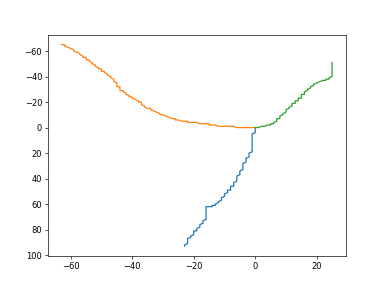

In [664]:
array = np.array
plt.close('all')
d=[array([0, 0]), array([1, 0]), array([2, 0]), array([3, 0]), array([4, 0]), array([ 5, -1]), array([ 6, -1]), array([ 7, -1]), array([ 8, -1]), array([ 9, -1]), array([10, -1]), array([11, -1]), array([12, -1]), array([13, -1]), array([14, -1]), array([15, -1]), array([16, -1]), array([17, -1]), array([18, -1]), array([19, -1]), array([20, -2]), array([21, -2]), array([22, -2]), array([23, -2]), array([24, -3]), array([25, -3]), array([26, -3]), array([27, -3]), array([28, -4]), array([29, -4]), array([30, -4]), array([31, -4]), array([32, -4]), array([33, -4]), array([34, -5]), array([35, -5]), array([36, -5]), array([37, -5]), array([38, -6]), array([39, -6]), array([40, -6]), array([41, -6]), array([42, -6]), array([43, -7]), array([44, -7]), array([45, -7]), array([46, -7]), array([46, -8]), array([47, -8]), array([48, -8]), array([49, -8]), array([49, -9]), array([50, -9]), array([51, -9]), array([ 52, -10]), array([ 53, -10]), array([ 54, -10]), array([ 55, -11]), array([ 56, -11]), array([ 57, -11]), array([ 58, -12]), array([ 59, -12]), array([ 60, -13]), array([ 61, -13]), array([ 61, -14]), array([ 62, -14]), array([ 62, -15]), array([ 62, -16]), array([ 63, -16]), array([ 64, -16]), array([ 65, -16]), array([ 66, -16]), array([ 67, -16]), array([ 68, -16]), array([ 69, -16]), array([ 70, -16]), array([ 71, -16]), array([ 72, -16]), array([ 73, -17]), array([ 74, -17]), array([ 75, -17]), array([ 76, -18]), array([ 77, -18]), array([ 78, -18]), array([ 79, -19]), array([ 80, -19]), array([ 81, -19]), array([ 81, -20]), array([ 82, -20]), array([ 83, -20]), array([ 84, -20]), array([ 85, -21]), array([ 86, -21]), array([ 87, -22]), array([ 88, -22]), array([ 89, -22]), array([ 90, -22]), array([ 91, -22]), array([ 92, -23]), array([ 93, -23]), array([0, 0]), array([ 0, -1]), array([ 0, -2]), array([ 0, -3]), array([ 0, -4]), array([ 0, -5]), array([ 0, -6]), array([-1, -7]), array([-1, -8]), array([-1, -9]), array([ -1, -10]), array([ -1, -11]), array([ -1, -12]), array([ -2, -13]), array([ -2, -14]), array([ -2, -15]), array([ -3, -15]), array([ -3, -16]), array([ -3, -17]), array([ -3, -18]), array([ -4, -19]), array([ -4, -20]), array([ -4, -21]), array([ -4, -22]), array([ -5, -22]), array([ -5, -23]), array([ -5, -24]), array([ -6, -25]), array([ -6, -26]), array([ -7, -26]), array([ -7, -27]), array([ -8, -28]), array([ -9, -29]), array([-10, -30]), array([-10, -31]), array([-11, -31]), array([-12, -32]), array([-13, -33]), array([-14, -34]), array([-15, -34]), array([-15, -35]), array([-16, -36]), array([-17, -36]), array([-18, -37]), array([-19, -37]), array([-20, -37]), array([-20, -38]), array([-21, -38]), array([-22, -39]), array([-23, -40]), array([-24, -40]), array([-24, -41]), array([-25, -41]), array([-26, -42]), array([-27, -42]), array([-28, -43]), array([-29, -43]), array([-29, -44]), array([-30, -44]), array([-31, -44]), array([-32, -44]), array([-32, -45]), array([-33, -45]), array([-34, -45]), array([-35, -45]), array([-36, -46]), array([-37, -46]), array([-38, -46]), array([-39, -47]), array([-40, -47]), array([-41, -48]), array([-42, -48]), array([-43, -49]), array([-44, -49]), array([-44, -50]), array([-45, -50]), array([-46, -50]), array([-46, -51]), array([-47, -51]), array([-48, -52]), array([-49, -52]), array([-50, -53]), array([-51, -53]), array([-52, -54]), array([-53, -54]), array([-53, -55]), array([-54, -55]), array([-55, -55]), array([-55, -56]), array([-56, -56]), array([-57, -57]), array([-58, -57]), array([-59, -58]), array([-60, -59]), array([-61, -59]), array([-62, -60]), array([-63, -61]), array([-64, -62]), array([-65, -62]), array([-65, -63]), array([0, 0]), array([0, 1]), array([-1,  2]), array([-1,  3]), array([-2,  4]), array([-2,  5]), array([-3,  5]), array([-3,  6]), array([-4,  6]), array([-5,  7]), array([-6,  7]), array([-7,  7]), array([-7,  8]), array([-8,  8]), array([-9,  8]), array([-10,   9]), array([-11,   9]), array([-12,  10]), array([-13,  10]), array([-14,  10]), array([-15,  11]), array([-16,  11]), array([-17,  12]), array([-18,  12]), array([-19,  12]), array([-19,  13]), array([-20,  13]), array([-21,  13]), array([-21,  14]), array([-22,  14]), array([-23,  14]), array([-23,  15]), array([-24,  15]), array([-25,  15]), array([-26,  15]), array([-26,  16]), array([-27,  16]), array([-28,  16]), array([-29,  17]), array([-30,  17]), array([-31,  18]), array([-32,  18]), array([-33,  19]), array([-34,  19]), array([-35,  20]), array([-36,  21]), array([-37,  22]), array([-37,  23]), array([-38,  23]), array([-38,  24]), array([-39,  24]), array([-40,  25]), array([-41,  25]), array([-42,  25]), array([-43,  25]), array([-44,  25]), array([-45,  25]), array([-46,  25]), array([-47,  25]), array([-48,  25]), array([-49,  25]), array([-50,  25]), array([-51,  25]), array([-51,  25]), array([-51,  25]), array([-51,  25]), array([-51,  25]), array([-51,  25]), array([-51,  25]), array([-51,  25]), array([-51,  25]), array([-51,  25]), array([-51,  25]), array([-51,  25]), array([-51,  25]), array([-51,  25]), array([-51,  25]), array([-51,  25]), array([-51,  25]), array([-51,  25]), array([-51,  25]), array([-51,  25]), array([-51,  25]), array([-51,  25]), array([-51,  25]), array([-51,  25]), array([-51,  25]), array([-51,  25]), array([-51,  25]), array([-51,  25]), array([-51,  25]), array([-51,  25]), array([-51,  25]), array([-51,  25]), array([-51,  25]), array([-51,  25]), array([-51,  25]), array([-51,  25]), array([-51,  25]), array([-51,  25])]

c1, c2, c3 = d[:100], d[100:200], d[200:]
for c in [c1, c2, c3]:
    y, x = zip(*c)
    plt.plot(x, y)
plt.gca().invert_yaxis()

d = c3+c1+c2
d = np.array(d).reshape(1, -1)
model.predict(d, verbose=0)[0]

## 6.3 Plot

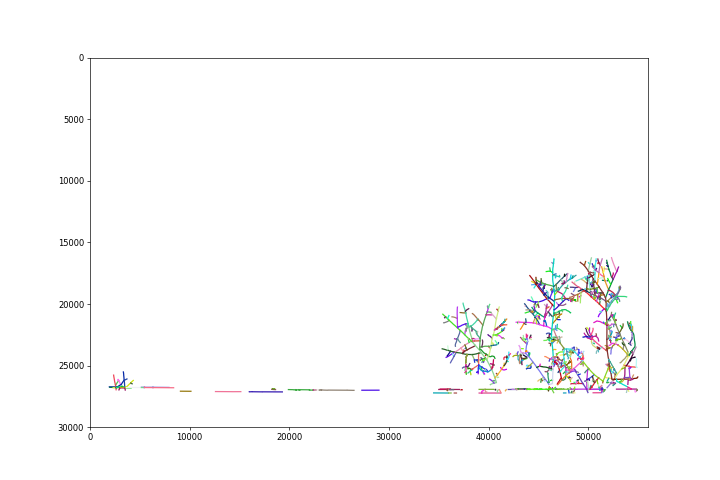

In [24]:
plt.close('all')
fig, ax1 = plt.subplots(1, 1, figsize=(12, 8))

def random_color():
    return tuple(random.random() for _ in range(3))

colors = {}
for _, value in H_ml.items():
    colors[value] = random_color()

for edge, value in H_ml.items():
    pixels = edge.pixel_list(last_index)
    x, y = zip(*pixels)
    plt.plot(y, x, color=colors[value])

plt.xlim(0, 56000)
plt.ylim(0, 30000)
plt.gca().invert_yaxis()

# 7. ML to geometrically learn intersections: set of 2

## 7.1 Load the dataset

In [99]:
dataset_path_2 = f"/Users/amin/Documents/AMOLF/Data/models/Intersection_dataset_2/{plates[0]}.p"

with open(dataset_path_2, "rb") as fp:   # Unpickling
    dataset_2 = pickle.load(fp)

3

## 7.2 Format the dataset

In [100]:
length_pixel_list = 100

X, y = [], []

for pixels_lists, label in dataset_2:
    pixels_lists_sliced = []
    for pixels in pixels_lists:
        pixels_to_add = (list(pixels)+([pixels[-1]]*length_pixel_list))[:length_pixel_list]
        pixels_lists_sliced.extend(pixels_to_add)
    X.append(np.array(pixels_lists_sliced).flatten())
    y.append(label)

split_index = int(len(X)*0.9)

X_train, X_test = X[:split_index], np.array(X[split_index:])
y_train, y_test = y[:split_index], np.array(y[split_index:])

# Train on all rotations
for pixels, label in zip(X_train.copy(), y_train.copy()):
    X_train.append(np.roll(pixels, 2*length_pixel_list))
    y_train.append(label)

zipped = list(zip(X_train, y_train))
random.shuffle(zipped)
X_train, y_train = zip(*zipped)
X_train, y_train = np.array(X_train), np.array(y_train)

## 7.3 Train

In [103]:
x = Input(shape=(length_pixel_list*2*2,))
h = Dense(64, activation='relu')(x)
y = Dense(1, activation='sigmoid')(h)
model = Model(x, y)

model.compile(optimizer=RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])
print("input shape ", model.input_shape)
print("output shape ", model.output_shape)

history = model.fit(
    X_train,
    y_train,
    validation_data=(X_test, y_test),
    batch_size=128,
    epochs=500,
    verbose=2
)

input shape  (None, 400)
output shape  (None, 1)
Epoch 1/500
19/19 - 1s - 31ms/step - accuracy: 0.7917 - loss: 5.0514 - val_accuracy: 0.8647 - val_loss: 3.1914
Epoch 2/500
19/19 - 0s - 3ms/step - accuracy: 0.8779 - loss: 1.8558 - val_accuracy: 0.8120 - val_loss: 1.3892
Epoch 3/500
19/19 - 0s - 3ms/step - accuracy: 0.8359 - loss: 2.7392 - val_accuracy: 0.8797 - val_loss: 1.2026
Epoch 4/500
19/19 - 0s - 3ms/step - accuracy: 0.8750 - loss: 1.8790 - val_accuracy: 0.9023 - val_loss: 1.2527
Epoch 5/500
19/19 - 0s - 3ms/step - accuracy: 0.8598 - loss: 2.4351 - val_accuracy: 0.8647 - val_loss: 1.3194
Epoch 6/500
19/19 - 0s - 3ms/step - accuracy: 0.8826 - loss: 1.9327 - val_accuracy: 0.6767 - val_loss: 5.1308
Epoch 7/500
19/19 - 0s - 3ms/step - accuracy: 0.8813 - loss: 1.9325 - val_accuracy: 0.9098 - val_loss: 1.0253
Epoch 8/500
19/19 - 0s - 3ms/step - accuracy: 0.8670 - loss: 1.9791 - val_accuracy: 0.8571 - val_loss: 1.1559
Epoch 9/500
19/19 - 0s - 2ms/step - accuracy: 0.8859 - loss: 1.7049 - 

## 7.4 Visualization

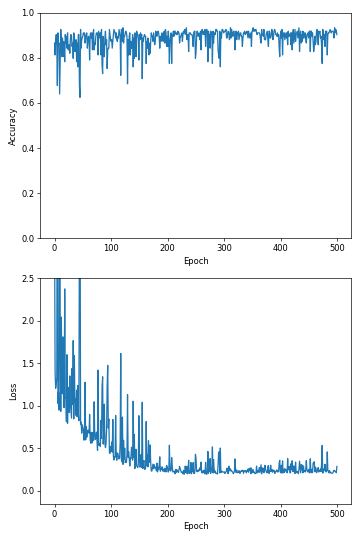

In [105]:
plt.close('all')
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 9))

ax1.plot(history.history["val_accuracy"])
ax1.set_ylabel("Accuracy")
ax1.set_ylim([0, 1])
ax1.set_xlabel("Epoch")

ax2.plot(history.history["val_loss"])
ax2.set_ylabel("Loss")
ax2.set_ylim(top=2.5)
ax2.set_xlabel("Epoch")
plt.tight_layout()

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 753us/step


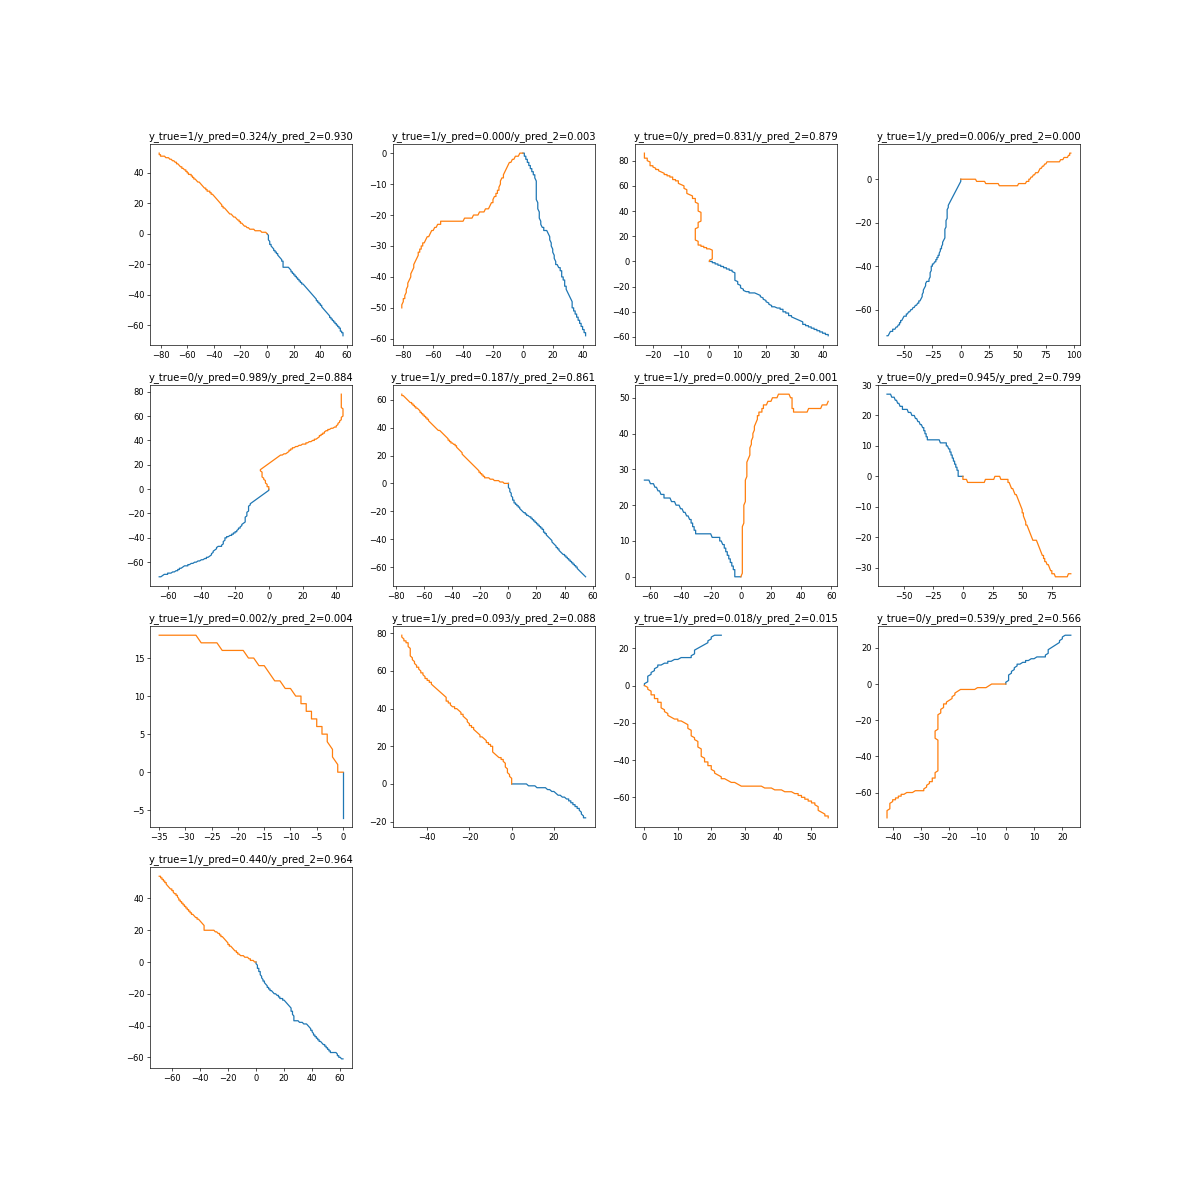

In [106]:
y_pred = model.predict(X_test)
y_pred_2 = model.predict(np.roll(X_test, 2*length_pixel_list, axis=1))
y_label_pred = np.where(y_pred<0.5, 0, 1)
y_label = y_test

plt.close('all')
plt.figure(figsize=(20,20))
i=0
for y_pr, y_pr_2, y_pred_label, y_true, pixels in zip(y_pred, y_pred_2, y_label_pred, y_label, X_test):
    if y_pred_label != y_true and i<16:
        i+=1
        plt.subplot(4,4,i)
        for k in range(2):
            plt.plot(pixels[length_pixel_list*2*k:length_pixel_list*(2*k+2):2], pixels[1+length_pixel_list*2*k:length_pixel_list*(2*k+2):2])
        plt.title(f'y_true={y_true}/y_pred={y_pr[0]:.3f}/y_pred_2={y_pr_2[0]:.3f}')

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 743us/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 694us/step


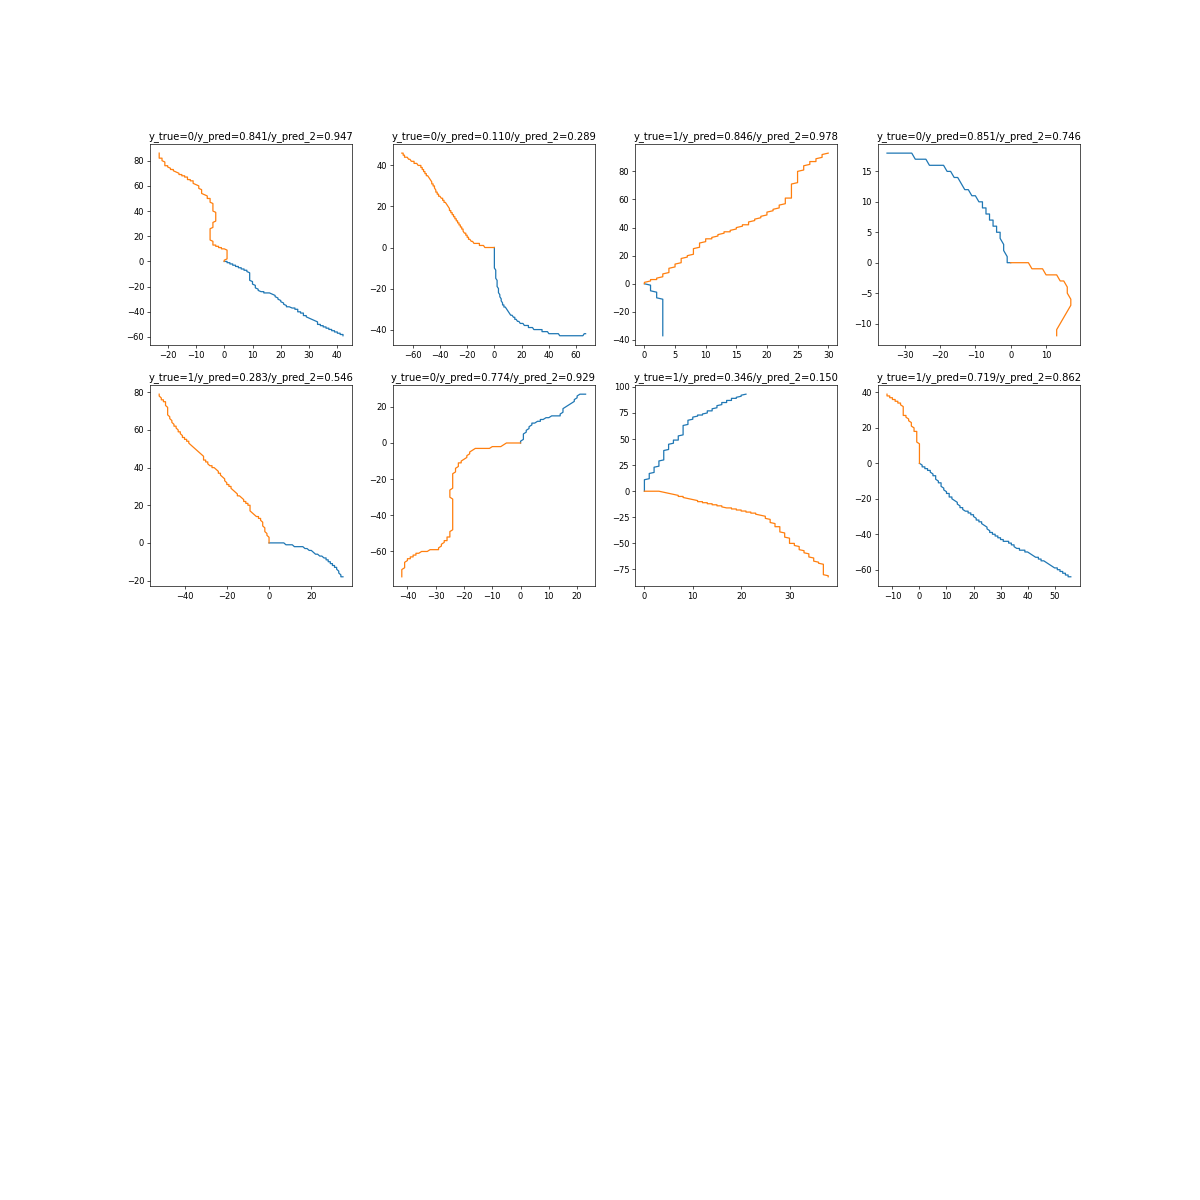

In [92]:
y_pred = model.predict(X_test)
y_pred_2 = model.predict(np.roll(X_test, 2*length_pixel_list, axis=1))
y_label_pred = np.where(y_pred<0.5, 0, 1)
y_label = y_test

plt.close('all')
plt.figure(figsize=(20,20))
i=0
for y_pr, y_pr_2, y_pred_label, y_true, pixels in zip(y_pred, y_pred_2, y_label_pred, y_label, X_test):
    if abs(y_pr[0]-y_pr_2[0])>0.1 and i<16:
        i+=1
        plt.subplot(4,4,i)
        for k in range(2):
            plt.plot(pixels[length_pixel_list*2*k:length_pixel_list*(2*k+2):2], pixels[1+length_pixel_list*2*k:length_pixel_list*(2*k+2):2])
        plt.title(f'y_true={y_true}/y_pred={y_pr[0]:.3f}/y_pred_2={y_pr_2[0]:.3f}')

## 7.5 Save the model

In [107]:
model_path = "/Users/amin/Documents/AMOLF/Data/models/intersection_model_2.keras"
model.save(model_path)

# 8. Hypergraph using ml set of 2

The * need to be run for this section

## 8.1 Functions

In [108]:
length_pixel_list = 100
model_path = "/Users/amin/Documents/AMOLF/Data/models/intersection_model_2.keras"
model = load_model(model_path)
positions = exp.positions[last_index]

def score_ml_2(v1, v2, v, positions):
    intersection = positions[v]
    data = []
    for vi in [v1, v2]:
        edge = Edge(Node(v, exp), Node(vi, exp), exp)
        pixels = np.array(edge.pixel_list(last_index)) - intersection
        if np.linalg.norm(pixels[0]) > np.linalg.norm(pixels[-1]):
            pixels = np.flip(pixels, 0)
        pixels = (list(pixels) + [pixels[-1]]*length_pixel_list)[:length_pixel_list]
        data.extend(pixels)
    data = np.array(data).reshape(1, -1)
    score = model.predict(data, verbose=0)[0] + model.predict(np.roll(data, 2*length_pixel_list), verbose=0)[0]
    return score
    

def edge_matches_ml_2(v, EExtract, E, positions, edges_time_interval) -> list:
    if len(EExtract) < 2:
        return []

    times = []
    vs = []
    for e in EExtract:
        v_i =  E[e][0] if E[e][1] == v else E[e][1]
        time_interval = edges_time_interval.get(f"{v_i},{v}")
        if time_interval is None:
            time, _ = edges_time_interval[f"{v},{v_i}"]
        else:
            time = time_interval[1]
        vs.append(v_i)
        times.append(time)

    min_time = min(times)
    min_time_edges = [index for index, time in enumerate(times) if time==min_time]

    if len(min_time_edges)==2:
        e1 = EExtract[min_time_edges[0]]
        e2 = EExtract[min_time_edges[1]]
        return [(e1, e2, 'time_resolved')] + edge_matches_ml_2(v, [edge_index for edge_index in EExtract if (edge_index!=e1 and edge_index!=e2)], E, positions, edges_time_interval)

    if len(min_time_edges) > 2:
        pairs = combinations(min_time_edges, 2)
        best_score = 0
        for index1, index2 in pairs:
            score = score_ml_2(vs[index1], vs[index2], v, positions)
            if score > best_score:
                best_score = score
                e1 = EExtract[index1]
                e2 = EExtract[index2]
        return [(e1, e2, 'geometricaly_resolved')] + edge_matches_ml_2(v, [edge_index for edge_index in EExtract if (edge_index!=e1 and edge_index!=e2)], E, positions, edges_time_interval)

    min_time_edge = min_time_edges[0]
    second_min_time = min([time for time in times if time!=min_time])
    second_time_edges = [index for index, time in enumerate(times) if time==second_min_time]
    
    if len(second_time_edges)==1:
        e1 = EExtract[min_time_edge]
        e2 = EExtract[second_time_edges[0]]
        return [(e1, e2, 'time_resolved')] + edge_matches_ml_2(v, [edge_index for edge_index in EExtract if (edge_index!=e1 and edge_index!=e2)], E, positions, edges_time_interval)

    e1 = EExtract[min_time_edge]
    best_score = 0
    for index in second_time_edges:
        score = score_ml_2(vs[index], vs[min_time_edge], v, positions)
        if score > best_score:
            best_score = score
            best_index= index
    e2 = EExtract[best_index]
    return [(e1, e2, 'geometricaly_resolved')] + edge_matches_ml_2(v, [edge_index for edge_index in EExtract if (edge_index!=e1 and edge_index!=e2)], E, positions, edges_time_interval)


def hypergraph_from_graph_ml_2(G, positions, edges_time_interval, get_time_resolved_intersections=False):
    V = list(G.nodes())
    E = list(G.edges())
    e = len(E)
    v = len(V)

    H = [0] * e
    Cor = [[0] * 10 for _ in range(e)]

    if get_time_resolved_intersections:
        time_resolved_intersections = []

    # STEP 1
    for i in tqdm(V, desc="Processing vertices"):
        EExtract = [edge_idx for edge_idx, edge in enumerate(E) if i in edge]
        matches = edge_matches_ml_2(i, EExtract, E, positions, edges_time_interval)
        for match in matches:
            e1, e2 = match[0], match[1]
            Cor[e1][Cor[e1].index(0)] = e2
            Cor[e2][Cor[e2].index(0)] = e1
        if get_time_resolved_intersections and matches and matches[0][2]=='time_resolved':
            time_resolved_intersections.append((EExtract, matches[0][0], matches[0][1], positions[i]))

    # STEP 2
    CurrentMark = 1
    for i in tqdm(range(e), desc="Processing stack"):
        if H[i] == 0:
            stack = [i]
            visited = set()  # To keep track of edges that have been added to the stack
            while stack:
                current = stack.pop()
                H[current] = CurrentMark
                # Only add edges to the stack that haven't been assigned to a hyperedge and aren't already on the stack
                related_edges = [
                    cor
                    for cor in Cor[current]
                    if cor != 0 and H[cor] == 0 and cor not in visited
                ]
                stack.extend(related_edges)
                visited.update(related_edges)
            CurrentMark += 1
    H = {edge: H[i] for i, edge in enumerate(E)}
    if get_time_resolved_intersections:
        return H, time_resolved_intersections
    return H

## 8.2 Instanciation

In [109]:
# Example usage
G = final_graph
E = list(G.edges())

# Add edges to G...
H = hypergraph_from_graph_ml_2(G, positions, edges_time_interval)
H = {Edge(Node(edge[0], exp), Node(edge[1], exp), exp): H[edge] for edge in H.keys()}

Processing vertices:   0%|          | 0/2603 [00:00<?, ?it/s]

Processing stack:   0%|          | 0/1561 [00:00<?, ?it/s]

## 8.3 Plot

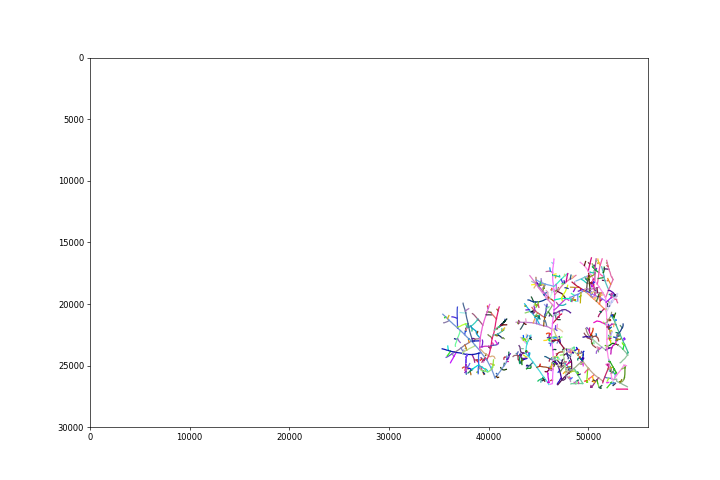

In [110]:
plt.close('all')
fig, ax1 = plt.subplots(1, 1, figsize=(12, 8))

def random_color():
    return tuple(random.random() for _ in range(3))

colors = {}
for _, value in H.items():
    colors[value] = random_color()

for edge, value in H.items():
    pixels = edge.pixel_list(last_index)
    x, y = zip(*pixels)
    plt.plot(y, x, color=colors[value])

plt.xlim(0, 56000)
plt.ylim(0, 30000)
plt.gca().invert_yaxis()

# 9. WIP